### Load Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [71]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [72]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shehan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shehan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shehan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Load the Data Set

In [73]:
df = pd.read_csv(r'C:\Users\Shehan\Downloads\IMDB Dataset.csv')
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Explore the data

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


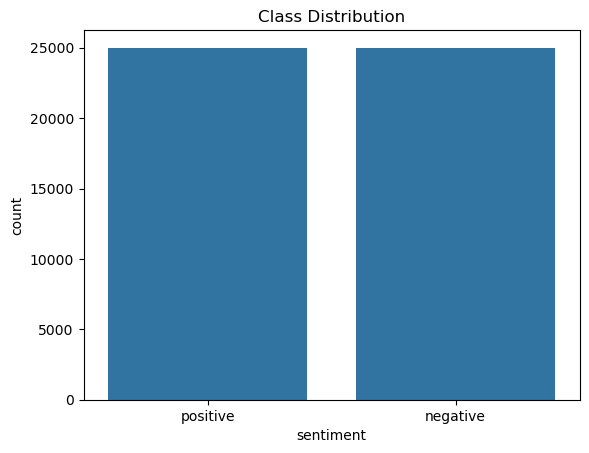

In [74]:
print(df['sentiment'].value_counts())
sns.countplot(data=df, x='sentiment')
plt.title('Class Distribution')
plt.show()

### Clean the Text

In [75]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # remove numbers and symbols
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(clean_text)

### WordClouds

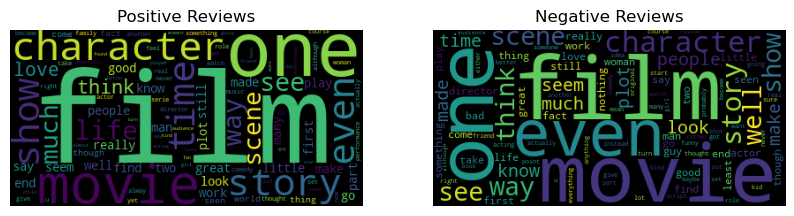

In [76]:
pos_text = ' '.join(df[df['sentiment'] == 'positive']['clean_review'])
neg_text = ' '.join(df[df['sentiment'] == 'negative']['clean_review'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(max_words=100).generate(pos_text))
plt.title("Positive Reviews")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(max_words=100).generate(neg_text))
plt.title("Negative Reviews")
plt.axis('off')
plt.show()

### Convert Text to Numbers(TF-IDF)

In [97]:
vectorizer = TfidfVectorizer(max_features=5)
X = vectorizer.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

### Train a logistic Regression Model

In [98]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split


X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)  # Binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)  # Now using the defined X_train and y_train variables

LogisticRegression()

### Evaluate the Model

In [99]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6
[[9 3]
 [5 3]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.50      0.38      0.43         8

    accuracy                           0.60        20
   macro avg       0.57      0.56      0.56        20
weighted avg       0.59      0.60      0.59        20



### ROC Curve

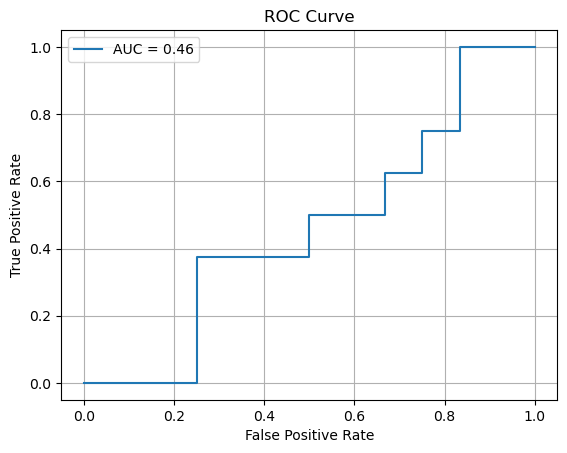

In [100]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


### Predict Your Own Review

In [101]:
# Assuming you have a trained model and vectorizer
# First, make sure  using the same vectorizer for prediction as you did for training

def predict_sentiment(text):
    
    features = vectorizer.transform([text])  # Use the same vectorizer instance used during training
    
    # Make prediction using the trained model
    prediction = model.predict(features)
    
    # Return the prediction (e.g., "positive" or "negative")
    return "positive" if prediction[0] == 1 else "negative"

# Now the function should work correctly
print(predict_sentiment("This movie was fantastic! I loved it."))
print(predict_sentiment("The film was boring and too long."))

positive
negative


In [102]:
def predict_sentiment(text):
    # Clean the text the same way you cleaned during training
    clean = clean_text(text)

    # Transform cleaned text using the same vectorizer
    features = vectorizer.transform([clean])

    # Predict
    prediction = model.predict(features)

    return "positive" if prediction[0] == 1 else "negative"


In [103]:
print(predict_sentiment("This movie was fantastic! I loved it."))


positive


In [104]:
print(predict_sentiment("This was the best movie I've ever seen. Amazing!"))
print(predict_sentiment("It was awful, I hated every minute."))


positive
negative


In [105]:
df['sentiment'].value_counts()


sentiment
positive    25000
negative    25000
Name: count, dtype: int64